# **Derivation of the Posterior Distribution of $\beta$ in Bayesian Linear Regression**

The likelihood function for $y$ given $\beta$ is:

$
p(y | \mathbf{X}, \beta, \sigma^2) = \mathcal{N}(\mathbf{X} \beta, \sigma^2 I)
$

which is proportional to:

$
\exp \left( -\frac{1}{2} (y - \mathbf{X} \beta)^T (\sigma^2 I)^{-1} (y - \mathbf{X} \beta) \right).
$

Since $(\sigma^2 I)^{-1} = \frac{1}{\sigma^2} I$, we simplify:

$
p(y | \mathbf{X}, \beta, \sigma^2) \propto \exp \left( -\frac{1}{2 \sigma^2} (y - \mathbf{X} \beta)^T (y - \mathbf{X} \beta) \right).
$


We assume a multivariate normal prior for $\beta$:

$
p(\beta) = \mathcal{N}(\beta_0, \Sigma_{\beta})
$

which is proportional to:

$
\exp \left( -\frac{1}{2} (\beta - \beta_0)^T \Sigma_{\beta}^{-1} (\beta - \beta_0) \right).
$

---


$
p(\beta | y, \mathbf{X}, \sigma^2) \propto p(y | \mathbf{X}, \beta, \sigma^2) p(\beta).
$


$
p(\beta | y, \mathbf{X}, \sigma^2) \propto \exp \left( -\frac{1}{2 \sigma^2} (y - \mathbf{X} \beta)^T (y - \mathbf{X} \beta) \right) \times \exp \left( -\frac{1}{2} (\beta - \beta_0)^T \Sigma_{\beta}^{-1} (\beta - \beta_0) \right).
$


$
\propto \exp \left( -\frac{1}{2} \left[ \frac{1}{\sigma^2} (y - \mathbf{X} \beta)^T (y - \mathbf{X} \beta) + (\beta - \beta_0)^T \Sigma_{\beta}^{-1} (\beta - \beta_0) \right] \right).
$


$
\propto \exp \left( -\frac{1}{2} \left[ \frac{1}{\sigma^2} (y^T y - 2 y^T \mathbf{X} \beta + \beta^T \mathbf{X}^T \mathbf{X} \beta) + \beta^T \Sigma_{\beta}^{-1} \beta - 2 \beta_0^T \Sigma_{\beta}^{-1} \beta + \beta_0^T \Sigma_{\beta}^{-1} \beta_0 \right] \right).
$


$
\propto \exp \left( -\frac{1}{2} \left[ \beta^T \left( \frac{1}{\sigma^2} \mathbf{X}^T \mathbf{X} + \Sigma_{\beta}^{-1} \right) \beta - 2 \beta^T \left( \frac{1}{\sigma^2} \mathbf{X}^T y + \Sigma_{\beta}^{-1} \beta_0 \right) \right] \right).
$

Recognizing the standard **Gaussian posterior form**, we identify:

$
\text{Precision matrix} = \left( \mathbf{X}^T \mathbf{X} / \sigma^2 + \Sigma_{\beta}^{-1} \right).
$

$
\text{Mean} = \left( \mathbf{X}^T \mathbf{X} / \sigma^2 + \Sigma_{\beta}^{-1} \right)^{-1} \left( \mathbf{X}^T y / \sigma^2 + \Sigma_{\beta}^{-1} \beta_0 \right).
$


Thus, the posterior distribution is:

$
p(\beta | y, \mathbf{X}, \sigma^2) = \mathcal{N} \left( \mu_{\beta}, \Sigma_{\beta}^{\text{post}} \right)
$

where:
$
\mu_{\beta} = \left( \mathbf{X}^T \mathbf{X} / \sigma^2 + \Sigma_{\beta}^{-1} \right)^{-1} \left( \mathbf{X}^T y / \sigma^2 + \Sigma_{\beta}^{-1} \beta_0 \right),
$

$
\Sigma_{\beta}^{\text{post}} = \left( \mathbf{X}^T \mathbf{X} / \sigma^2 + \Sigma_{\beta}^{-1} \right)^{-1}.
$

The posterior distribution of $\beta$ follows a **multivariate normal distribution** with the updated mean and covariance.

## Posterior of $ \sigma^2 $ with an Inverse-Gamma Prior

**Likelihood**:  
  Given $ y | \beta, \sigma^2 $, we assume:

  $
  y | \beta, \sigma^2 \sim \mathcal{N}(\mathbf{X}\beta, \sigma^2 I).
  $

The likelihood function is:

  $
  p(y | \beta, \sigma^2) \propto (\sigma^2)^{-n/2} \exp \left( -\frac{1}{2\sigma^2} (y - \mathbf{X} \beta)^\top (y - \mathbf{X} \beta) \right).
  $

**Prior**:  
Assume an **Inverse-Gamma prior** for $ \sigma^2 $:

  $
  p(\sigma^2) = \text{IG}(\alpha^*, \beta^*) \propto (\sigma^2)^{-(\alpha^* + 1)} \exp \left( -\frac{\beta^*}{\sigma^2} \right).
  $

**Posterior Calculation**:  
The posterior is:

  $
  p(\sigma^2 | y, \beta) \propto p(y | \beta, \sigma^2) p(\sigma^2).
  $


  $
  (\sigma^2)^{-n/2} \exp \left( -\frac{1}{2\sigma^2} (y - \mathbf{X} \beta)^\top (y - \mathbf{X} \beta) \right)
  \times (\sigma^2)^{-(\alpha^* + 1)} \exp \left( -\frac{\beta^*}{\sigma^2} \right).
  $


  $
  (\sigma^2)^{-(\alpha^* + n/2 + 1)} \exp \left( -\frac{1}{\sigma^2} \left( \beta^* + \frac{1}{2} (y - \mathbf{X} \beta)^\top (y - \mathbf{X} \beta) \right) \right).
  $

This matches the form of an **Inverse-Gamma distribution**, so the posterior is:

  $
  p(\sigma^2 | y, \beta) = \text{IG} \left( \alpha^* + \frac{n}{2}, \beta^* + \frac{1}{2} (y - \mathbf{X} \beta)^\top (y - \mathbf{X} \beta) \right).
  $

In [11]:
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
import aesara.tensor as at 

# Diabetes dataset 
data = load_diabetes()
X = data.data  
y = data.target  

scaler = StandardScaler()
X = scaler.fit_transform(X)
y = (y - np.mean(y)) / np.std(y)  # Standardize

n, p = X.shape  


with pm.Model() as model:

    betas = pm.Normal('betas', mu=0, sigma=1, shape=p)
    
    # Prior for sigma (error term) using a half-Cauchy 
    sigma = pm.HalfCauchy('sigma', beta=1)
    
    # Likelihood 
    mu = pm.math.dot(X, betas)
    y_obs = pm.Normal('y', mu=mu, sigma=sigma, observed=y)
    
    # MCMC 
    trace = pm.sample(2000, return_inferencedata=True, target_accept=0.9)




/opt/conda/lib/python3.11/site-packages/multipledispatch/dispatcher.py:27: AmbiguityWarning: 
Ambiguities exist in dispatched function _unify

The following signatures may result in ambiguous behavior:
	[ConstrainedVar, object, Mapping], [object, ConstrainedVar, Mapping]
	[ConstrainedVar, Var, Mapping], [object, ConstrainedVar, Mapping]
	[object, ConstrainedVar, Mapping], [ConstrainedVar, Var, Mapping]
	[object, ConstrainedVar, Mapping], [ConstrainedVar, object, Mapping]


Consider making the following additions:

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...)

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...)

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...)

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...)
  warn(warning_text(dispatcher.name, ambiguities), AmbiguityWarning)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas, sigma]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 11 seconds.


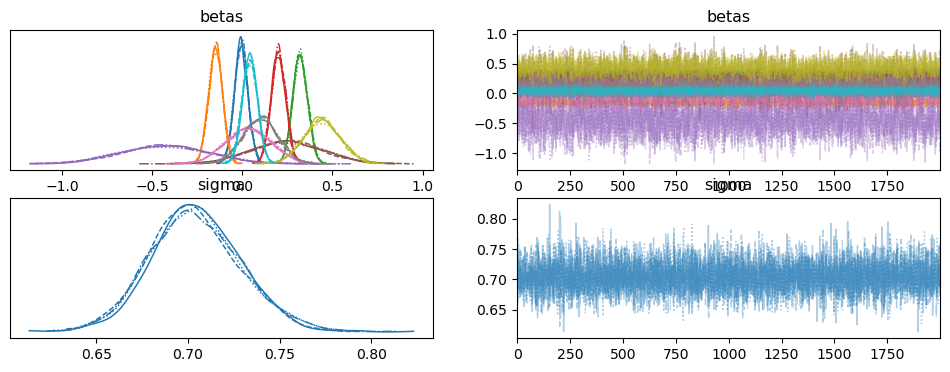

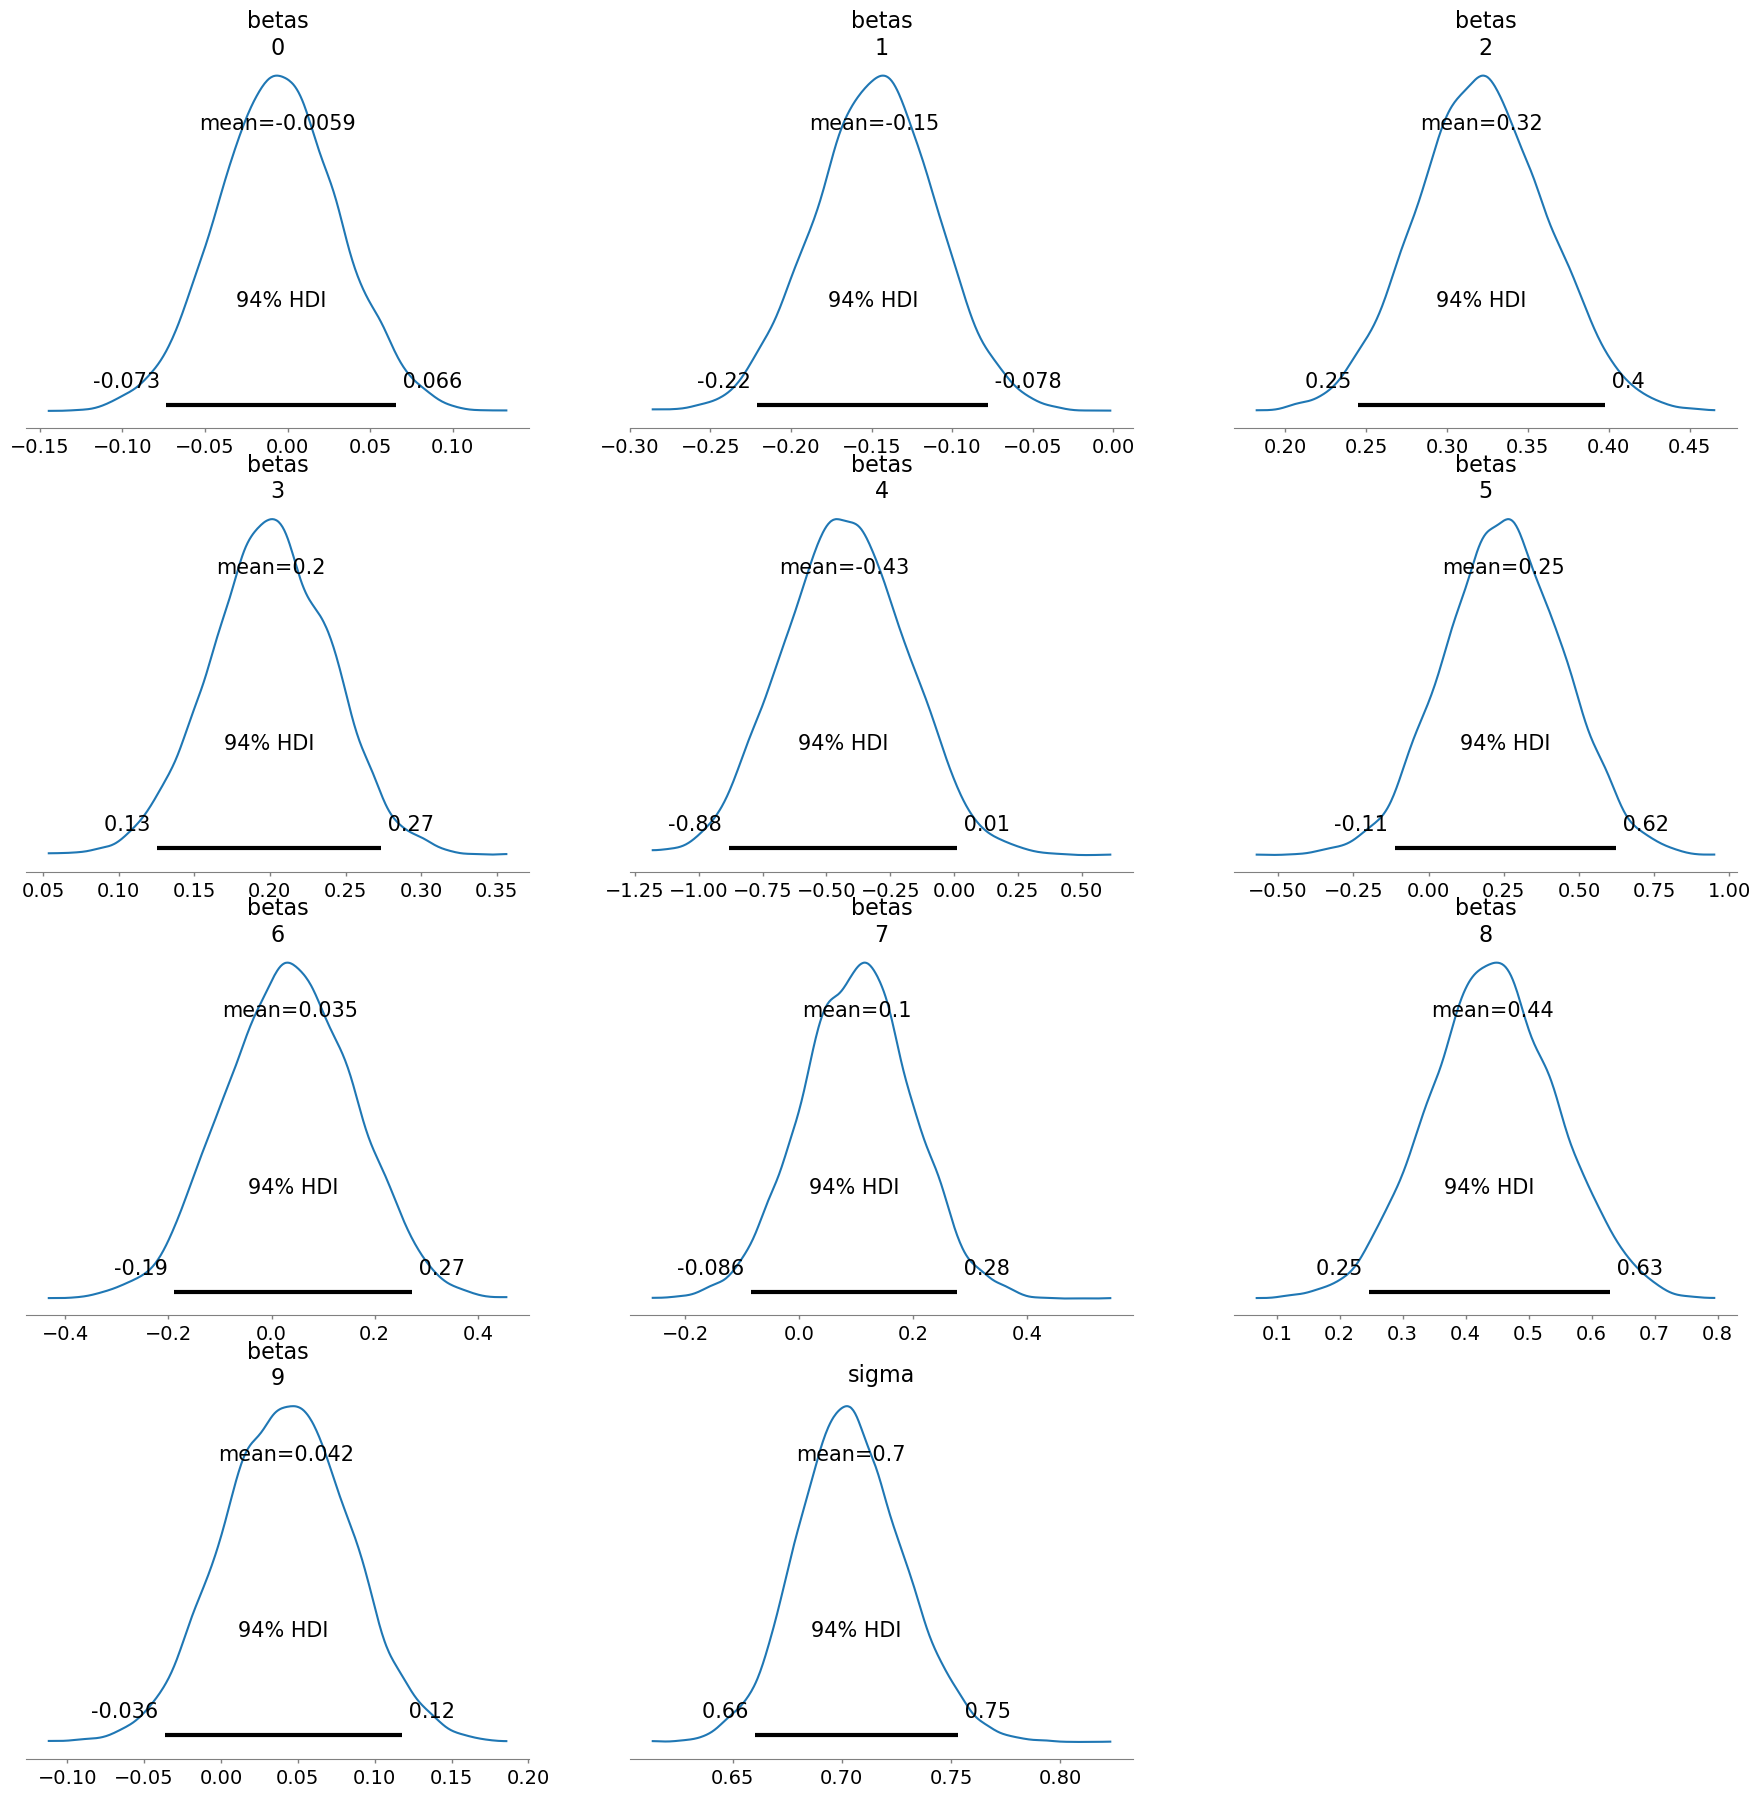

In [12]:
az.plot_trace(trace)
plt.show()


az.plot_posterior(trace, var_names=['betas', 'sigma'])
plt.show() 

In [14]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[0],-0.006,0.037,-0.073,0.066,0.000,0.000,10521.0,6355.0,1.0
betas[1],-0.148,0.038,-0.221,-0.078,0.000,0.000,10605.0,5999.0,1.0
betas[2],0.321,0.041,0.245,0.397,0.000,0.000,8081.0,5895.0,1.0
betas[3],0.201,0.040,0.125,0.274,0.000,0.000,8843.0,6266.0,1.0
betas[4],-0.429,0.242,-0.882,0.010,0.004,0.003,3261.0,4137.0,1.0
betas[5],0.248,0.198,-0.112,0.621,0.003,0.002,3580.0,4616.0,1.0
betas[6],0.035,0.125,-0.189,0.273,0.002,0.001,3525.0,4638.0,1.0
betas[7],0.100,0.097,-0.086,0.277,0.001,0.001,6457.0,5496.0,1.0
betas[8],0.442,0.102,0.246,0.629,0.002,0.001,3832.0,4894.0,1.0
betas[9],0.042,0.041,-0.036,0.118,0.000,0.000,9483.0,6311.0,1.0


In [25]:
data = load_diabetes()
X = data.data
y = data.target


scaler = StandardScaler()
X = scaler.fit_transform(X)
y = (y - np.mean(y)) / np.std(y) 
n, p = X.shape

# Introduce outliers to the dataset 
outlier_indices = np.random.choice(range(n), size=5, replace=False)
y_outliers = y.copy()
y_outliers[outlier_indices] += np.random.normal(5, 1, size=5)  

# Robust Bayesian Linear Regression Model
with pm.Model() as robust_model_no_at:
    # Priors
    beta = pm.Normal("beta", mu=0, sigma=1, shape=p)
    tau = pm.HalfCauchy("tau", beta=1)
    nu = pm.Gamma("nu", alpha=2, beta=0.1)  # Heavy-tailed prior
    tau_i = pm.Gamma("tau_i", alpha=nu / 2, beta=nu / 2, shape=n)  # Individual variance

    # Likelihood with heteroscedasticity 
    mu = pm.math.dot(X, beta)
    sigma_i = pm.Deterministic("sigma_i", (tau * tau_i) ** 0.5)  # NumPy-based sqrt
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma_i, observed=y_outliers)

    
    robust_trace_no_at = pm.sample(1000, return_inferencedata=True, cores=2, tune=500)







Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, tau, nu, tau_i]


Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 11 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


In [27]:
az.summary(robust_trace, var_names=["beta", "tau", "nu"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta[0],0.009,0.039,-0.061,0.087,0.001,0.001,1649.0,2096.0,1.00
beta[1],-0.188,0.041,-0.264,-0.112,0.001,0.001,1519.0,2424.0,1.00
beta[2],0.319,0.044,0.242,0.404,0.001,0.001,1831.0,2384.0,1.00
beta[3],0.227,0.044,0.144,0.308,0.001,0.001,1608.0,2920.0,1.00
beta[4],-0.392,0.259,-0.895,0.092,0.008,0.006,1076.0,1363.0,1.00
beta[5],0.187,0.210,-0.237,0.560,0.006,0.004,1161.0,1455.0,1.00
beta[6],0.021,0.133,-0.230,0.269,0.004,0.003,1155.0,1948.0,1.00
beta[7],0.138,0.110,-0.064,0.347,0.003,0.002,1839.0,1783.0,1.00
beta[8],0.434,0.106,0.225,0.624,0.003,0.002,1184.0,1983.0,1.00
beta[9],0.023,0.044,-0.057,0.107,0.001,0.001,2095.0,2547.0,1.00


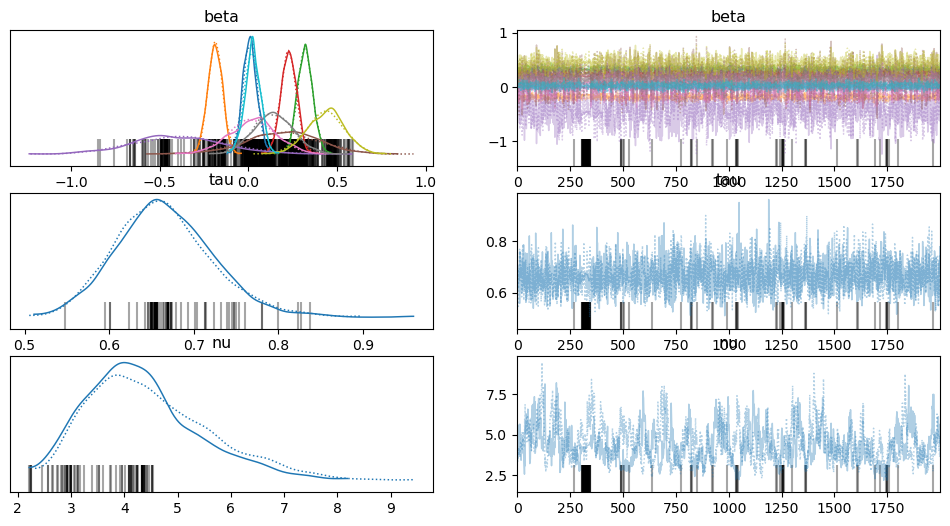

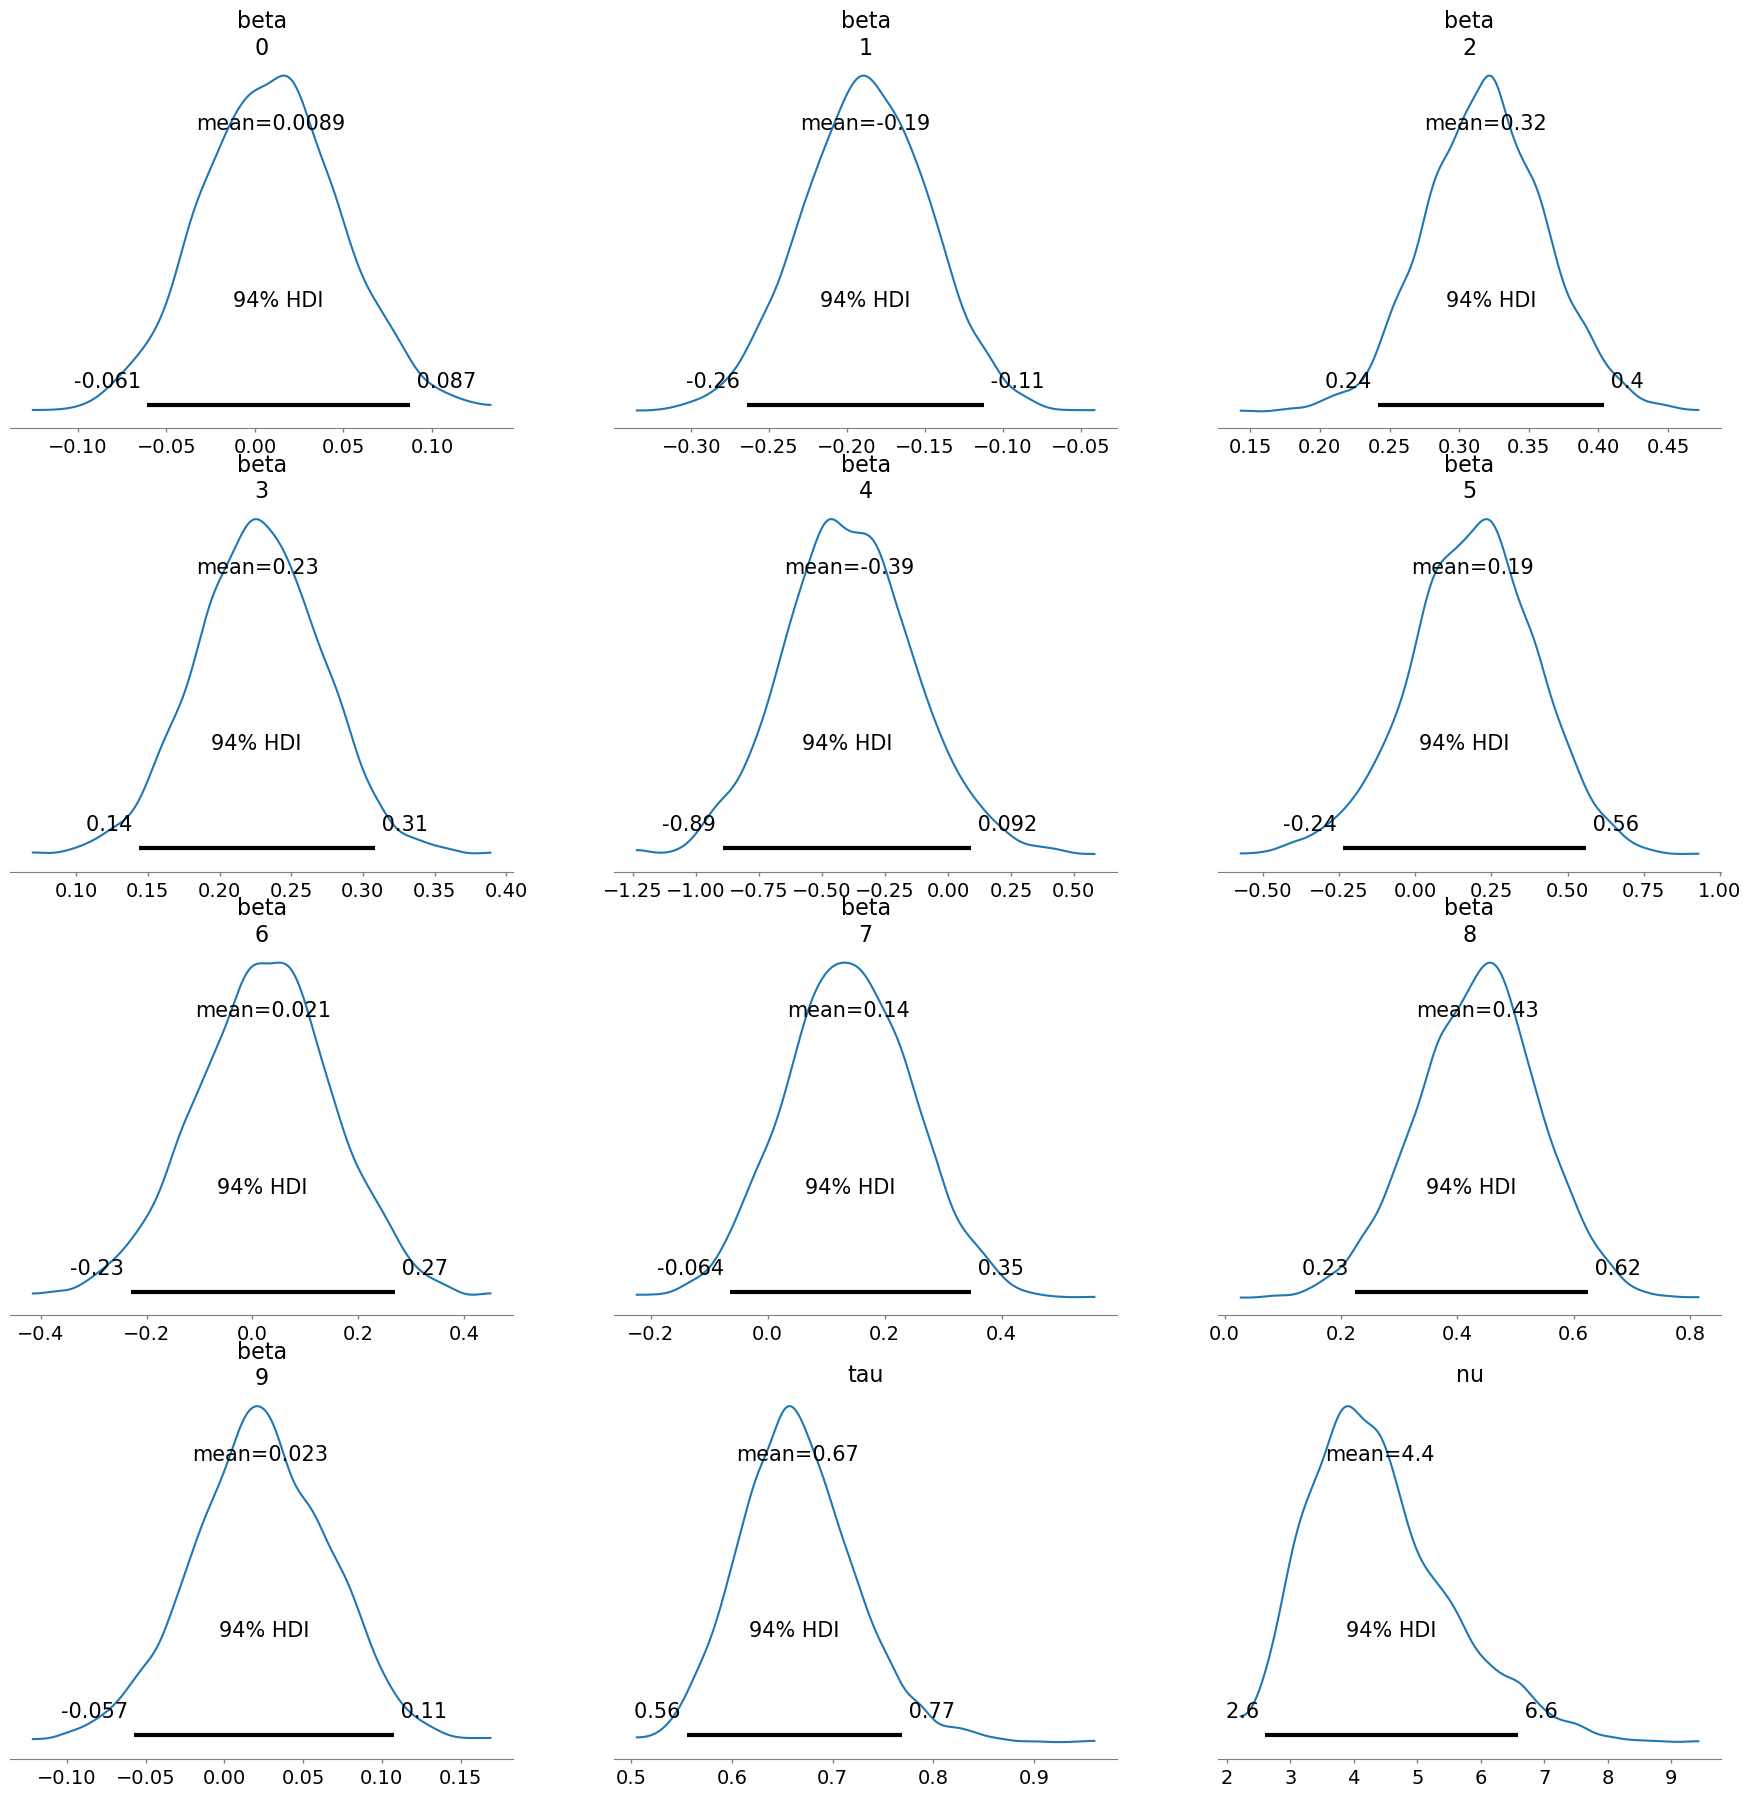

array([321,  73,  72, 287, 211])

In [30]:
az.plot_trace(robust_trace, var_names=["beta", "tau", "nu"])
plt.show()

az.plot_posterior(robust_trace, var_names=['beta', 'tau', 'nu'])
plt.show()  


tau_i_posterior = robust_trace.posterior["tau_i"].mean(dim=("chain", "draw")).values
outlier_detected = np.argsort(tau_i_posterior)[-5:]  # Top 5 highest values


outlier_detected

